In [1]:
import pathlib
import ggcmpy
from ggcmpy.timeseries import read_ggcm_solarwind_directory, store_to_pyspedas
import xarray as xr
import pyspedas
import matplotlib.pyplot as plt
from matplotlib import colors


RUN_NAME="storm202511"
RUN_DIR=pathlib.Path("/mnt/lustre/germaschewski/kaig/ggcm") / RUN_NAME
SW_DIR=pathlib.Path("/mnt/lustre/germaschewski/kaig/idata-20251111")
DATA_DIR=RUN_DIR / "target"

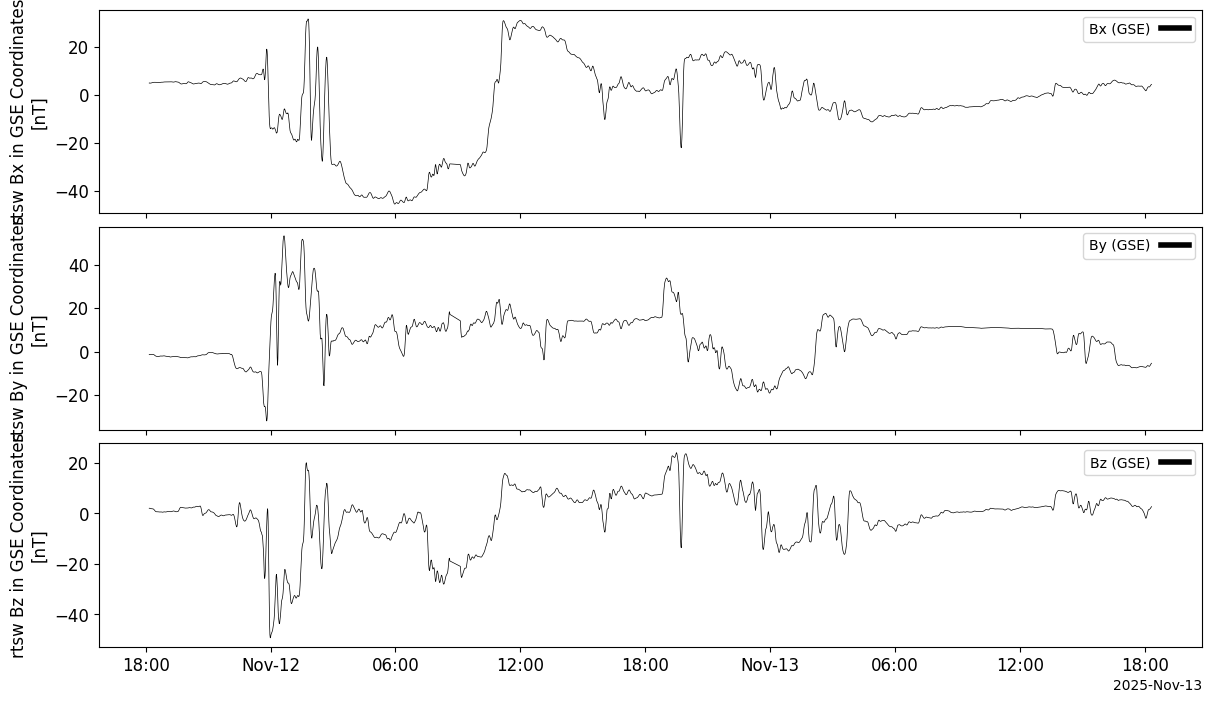

In [2]:
rtsw = read_ggcm_solarwind_directory(SW_DIR)
store_to_pyspedas(rtsw)
pyspedas.tplot(["rtsw.bxgse", "rtsw.bygse", "rtsw.bzgse"])


In [3]:
files = sorted(DATA_DIR.glob(f"{RUN_NAME}.iof.*00"))
iof = xr.open_mfdataset(files)
# iof = iof.isel(time=slice(None, None, 10))
iof

<xarray.Dataset> Size: 1GB
Dimensions:       (time: 213, longs: 121, lats: 361)
Coordinates:
  * lats          (lats) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longs         (longs) float64 968B -180.0 -177.0 -174.0 ... 177.0 180.0
  * time          (time) datetime64[ns] 2kB 2025-11-11T22:05:00.091000 ... 20...
Data variables: (12/30)
    prec_e_fe_1   (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    prec_e_e0_1   (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    prec_e_fe_2   (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    prec_e_e0_2   (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    pacurr        (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    fac_tot       (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    ...            ...
    delbt         (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    epio          (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    etio          (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    xjh           (time, longs, lats) float32 37MB dask.array<chunksize=(1, 121, 361), meta=np.ndarray>
    inttime       (time) int64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    elapsed_time  (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    run:      storm202511

In [4]:
cpcp = iof.ggcm.cpcp().rename("ggcm.cpcp") * 1e-3 # convert V -> kV
cpcp.attrs["name"] = "OpenGGCM CPCP"
cpcp.attrs["units"] = "kV"
store_to_pyspedas(cpcp)

In [5]:
iof["ggcm.min_delb"] = (-iof.delbt).sel(lats=slice(90, 0)).min(dim=["lats", "longs"]).compute()
iof["ggcm.min_delb"] *= 1e9  # convert to nT
iof["ggcm.min_delb"].attrs["long_name"] = "OpenGGCm Minimum delta B"
iof["ggcm.min_delb"].attrs["name"] = "Min Delta B"
iof["ggcm.min_delb"].attrs["units"] = "nT"
store_to_pyspedas(iof["ggcm.min_delb"])

In [6]:
pyspedas.projects.kyoto.dst(trange=["2025-11-11 00:00:00", "2025-11-13 00:00:00"])

09-Dec-25 11:31:34: Remote file not found: http://wdc.kugi.kyoto-u.ac.jp/dst_final/202511/index.html
09-Dec-25 11:31:34: No local files found for http://wdc.kugi.kyoto-u.ac.jp/dst_final/202511/index.html
09-Dec-25 11:31:34: Error occurred while downloading: http://wdc.kugi.kyoto-u.ac.jp/dst_final/202511/index.html
09-Dec-25 11:31:35: Remote file not found: http://wdc.kugi.kyoto-u.ac.jp/dst_provisional/202511/index.html
09-Dec-25 11:31:35: No local files found for http://wdc.kugi.kyoto-u.ac.jp/dst_provisional/202511/index.html
09-Dec-25 11:31:35: Error occurred while downloading: http://wdc.kugi.kyoto-u.ac.jp/dst_provisional/202511/index.html
09-Dec-25 11:31:35: Downloading http://wdc.kugi.kyoto-u.ac.jp/dst_realtime/202511/index.html to pydata/geom_indices/kyoto/dst_realtime/202511/index.html
09-Dec-25 11:31:35: Download of pydata/geom_indices/kyoto/dst_realtime/202511/index.html complete, 0.005 MB in 0.9 sec (0.006 MB/sec) (transfer_normal)
09-Dec-25 11:31:35: 
            ************

['kyoto_dst']

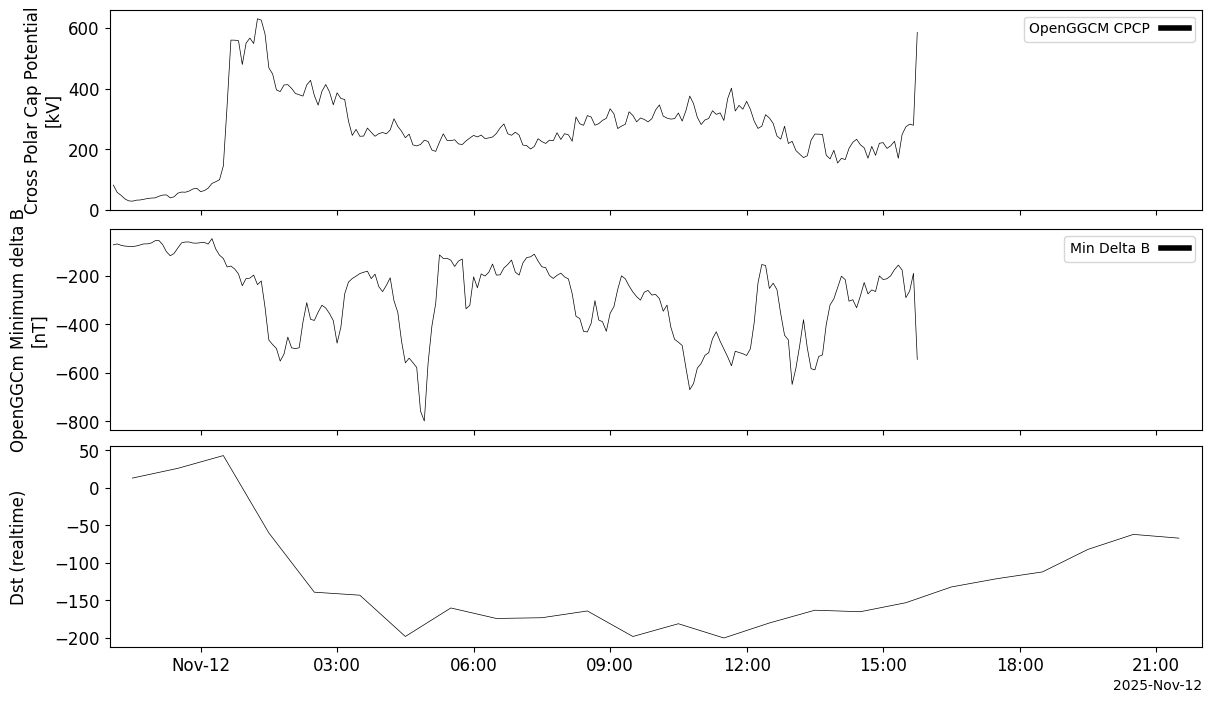

In [7]:
pyspedas.timespan("2025-11-11 22:00:00", 24, "h")
pyspedas.tplot(["ggcm.cpcp", "ggcm.min_delb", "kyoto_dst"])

In [8]:
files = sorted(DATA_DIR.glob(f"{RUN_NAME}.py_0.*00"))
py_0 = xr.open_mfdataset(files)
py_0

<xarray.Dataset> Size: 1GB
Dimensions:       (time: 213, x: 485, z: 180, y: 1)
Coordinates:
  * x             (x) float32 2kB -35.01 -34.68 -34.36 ... 4.856e+03 5e+03
  * y             (y) float64 8B 0.0
  * z             (z) float32 720B -48.01 -46.65 -45.32 ... 45.32 46.65 48.01
  * time          (time) datetime64[ns] 2kB 2025-11-11T22:05:00.091000 ... 20...
Data variables: (12/16)
    bx            (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    by            (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    bz            (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    vx            (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    vy            (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    vz            (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    ...            ...
    xjy           (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    xjz           (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    xtra1         (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    xtra2         (time, x, z) float32 74MB dask.array<chunksize=(1, 485, 180), meta=np.ndarray>
    inttime       (time) int64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
    elapsed_time  (time) float64 2kB dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    run:      storm202511

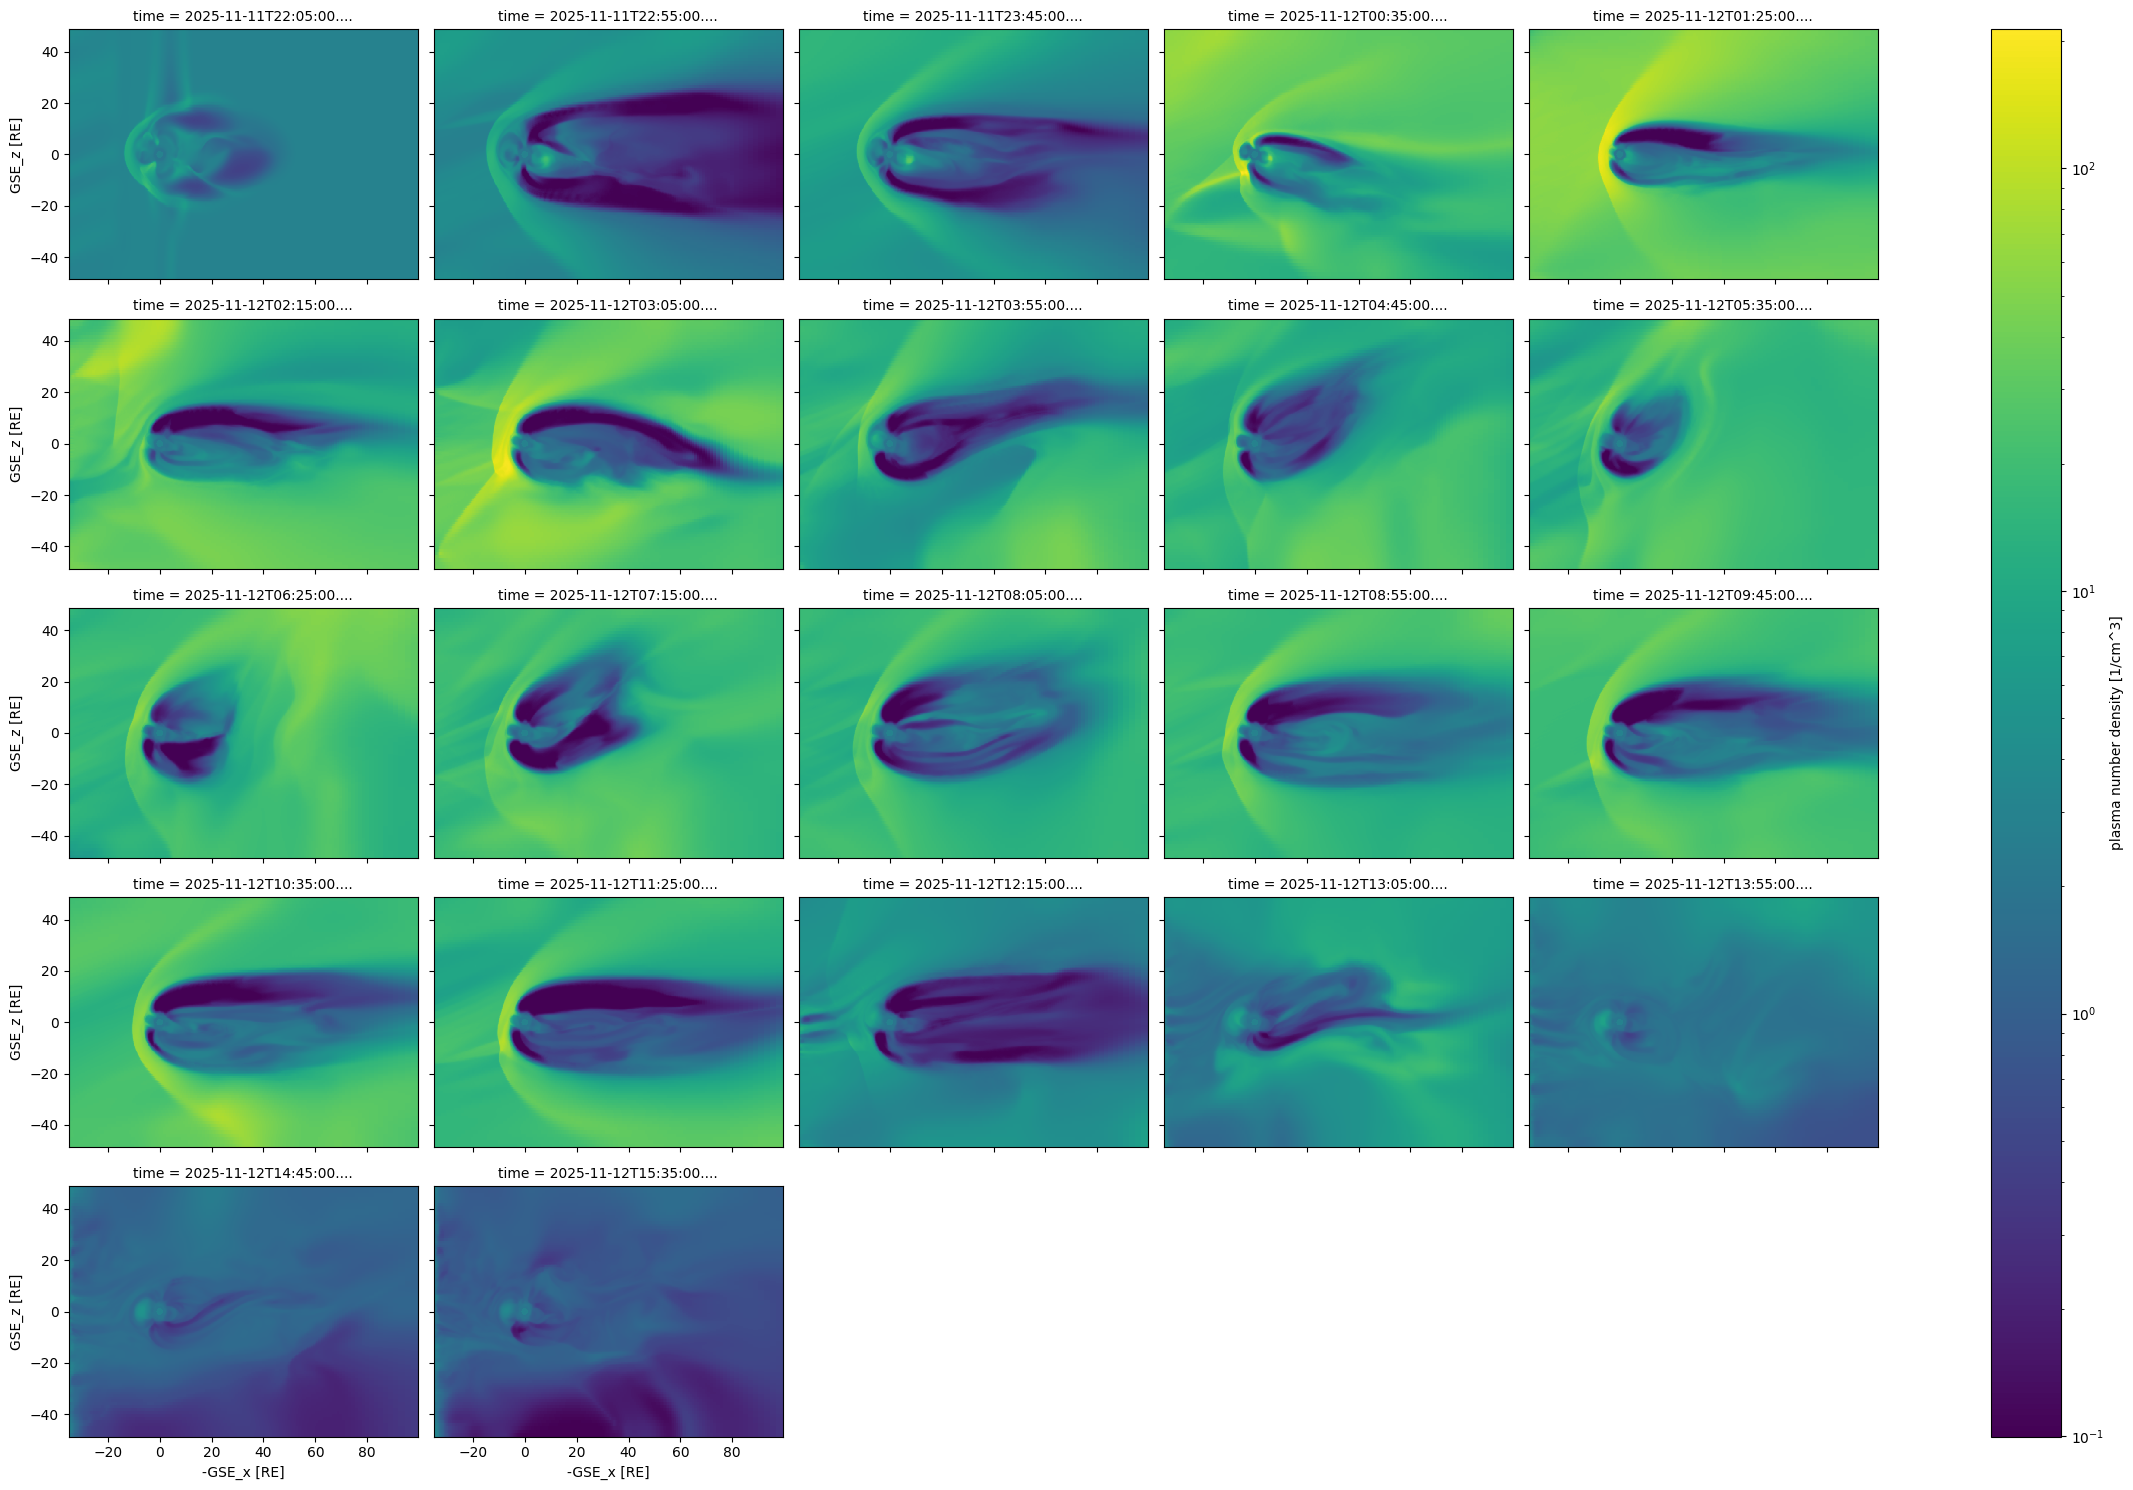

In [9]:
py_0.rr.sel(x=slice(-50., 100.), z=slice(-50., 50.)).isel(time=slice(0, None, 10)).T.plot(col="time", col_wrap=5, aspect=1.5, size=3, norm=colors.LogNorm());

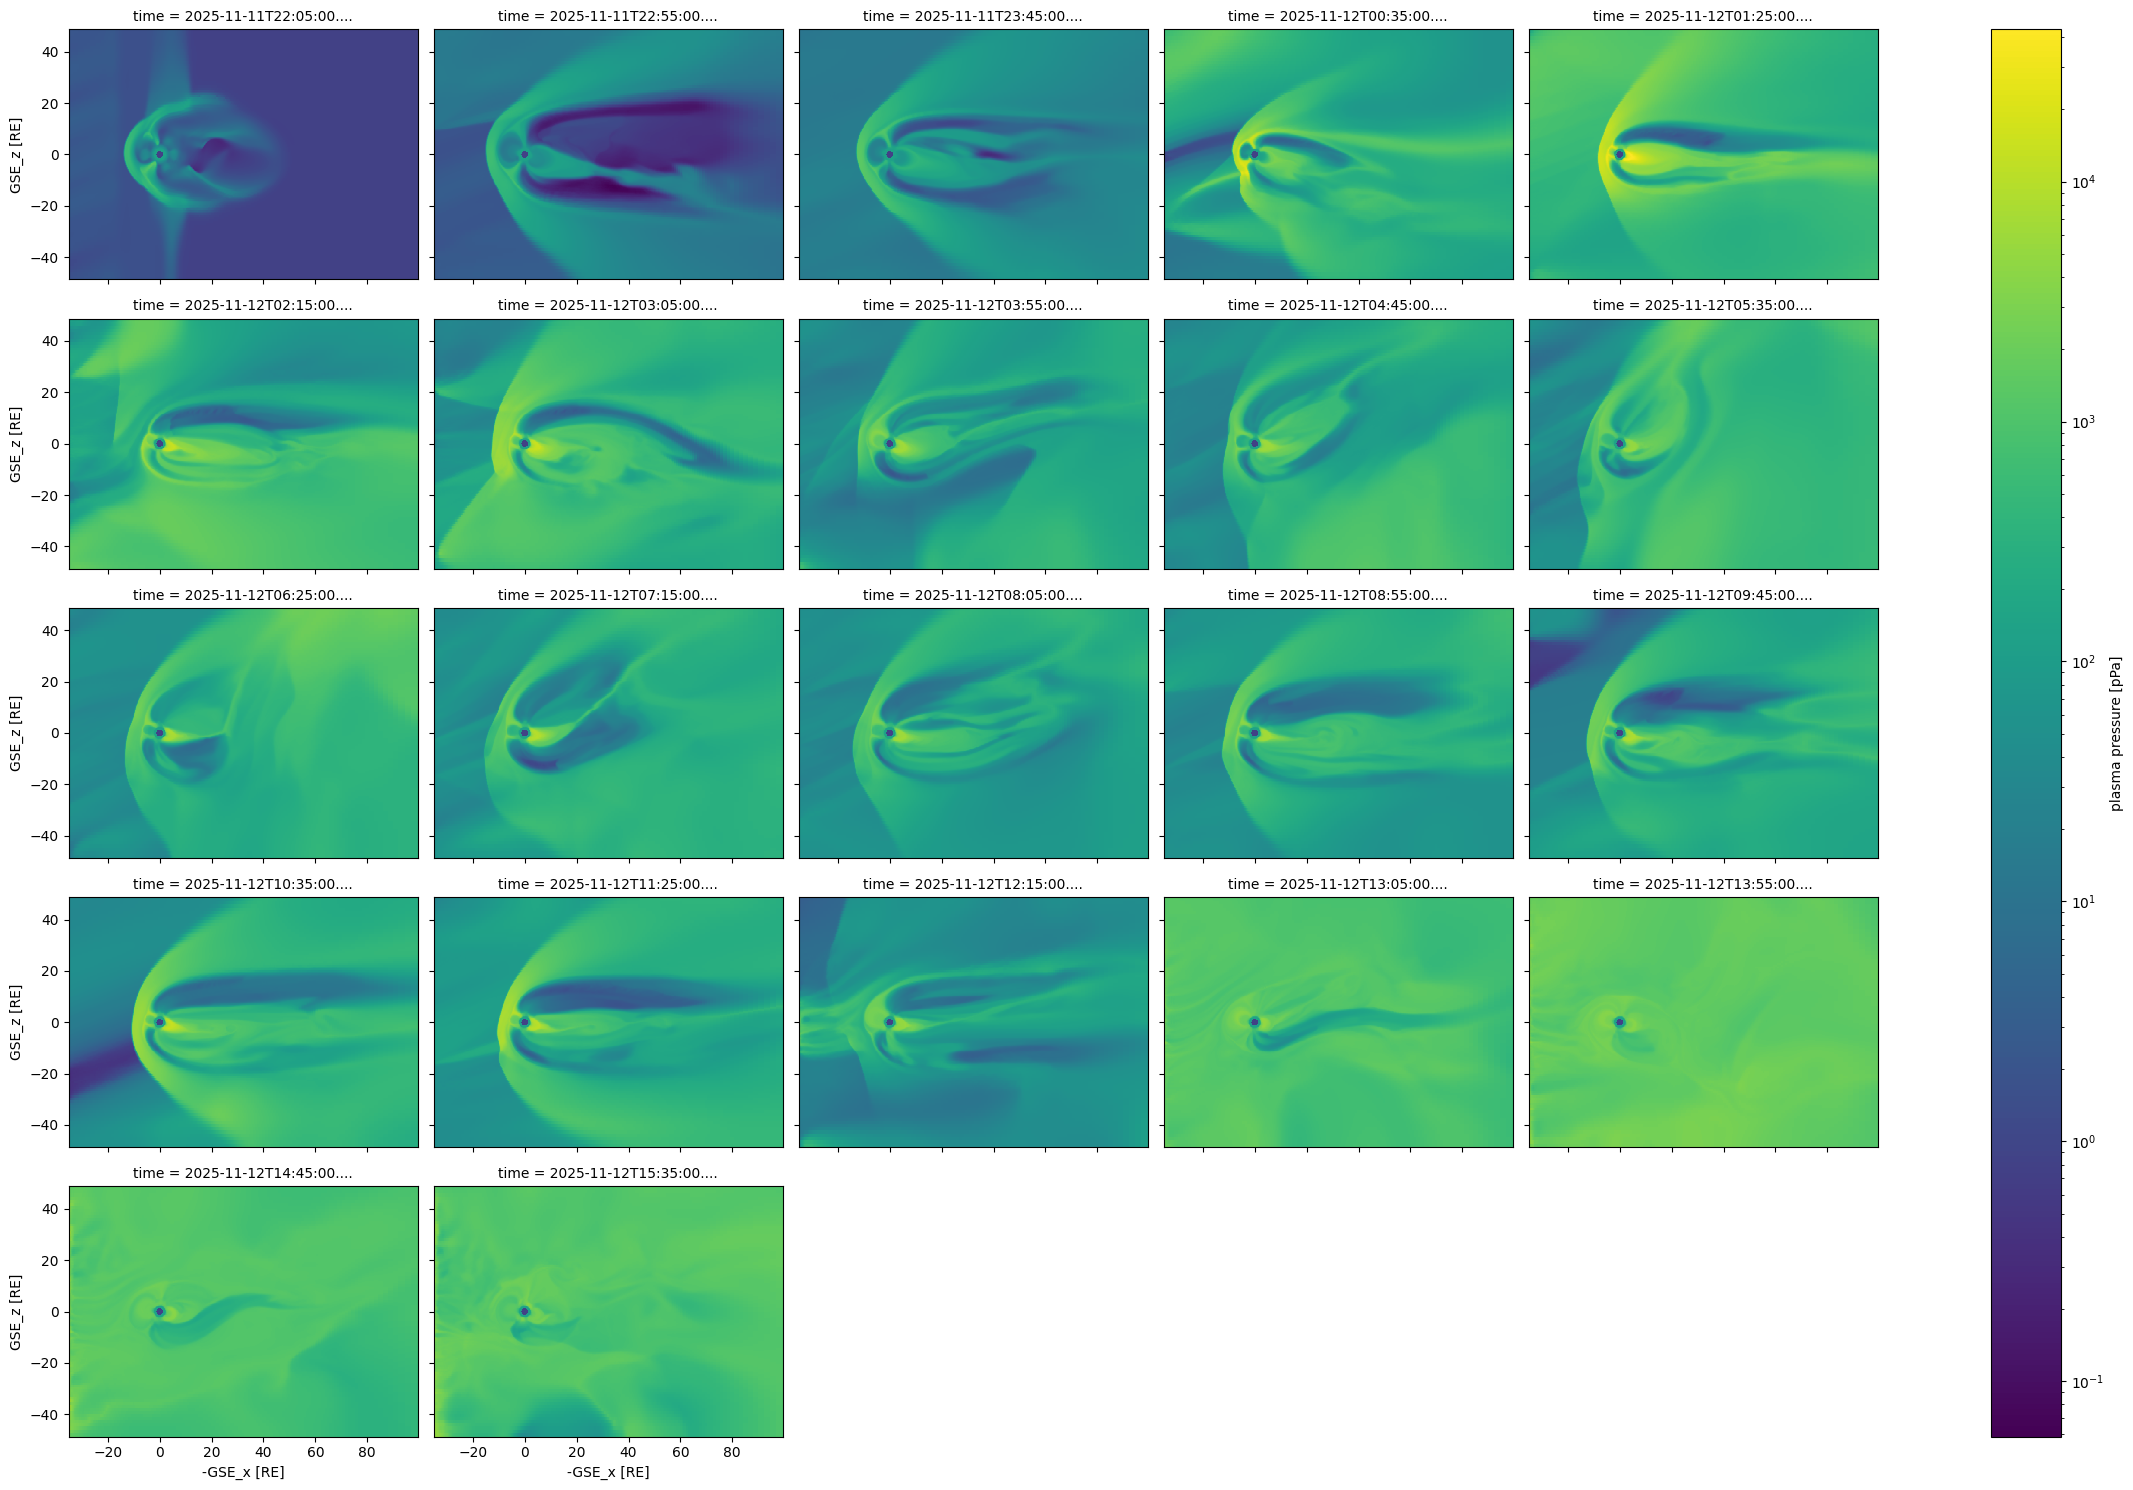

In [10]:
py_0.pp.sel(x=slice(-50., 100.), z=slice(-50., 50.)).isel(time=slice(0, None, 10)).T.plot(col="time", col_wrap=5, aspect=1.5, size=3, norm=colors.LogNorm());

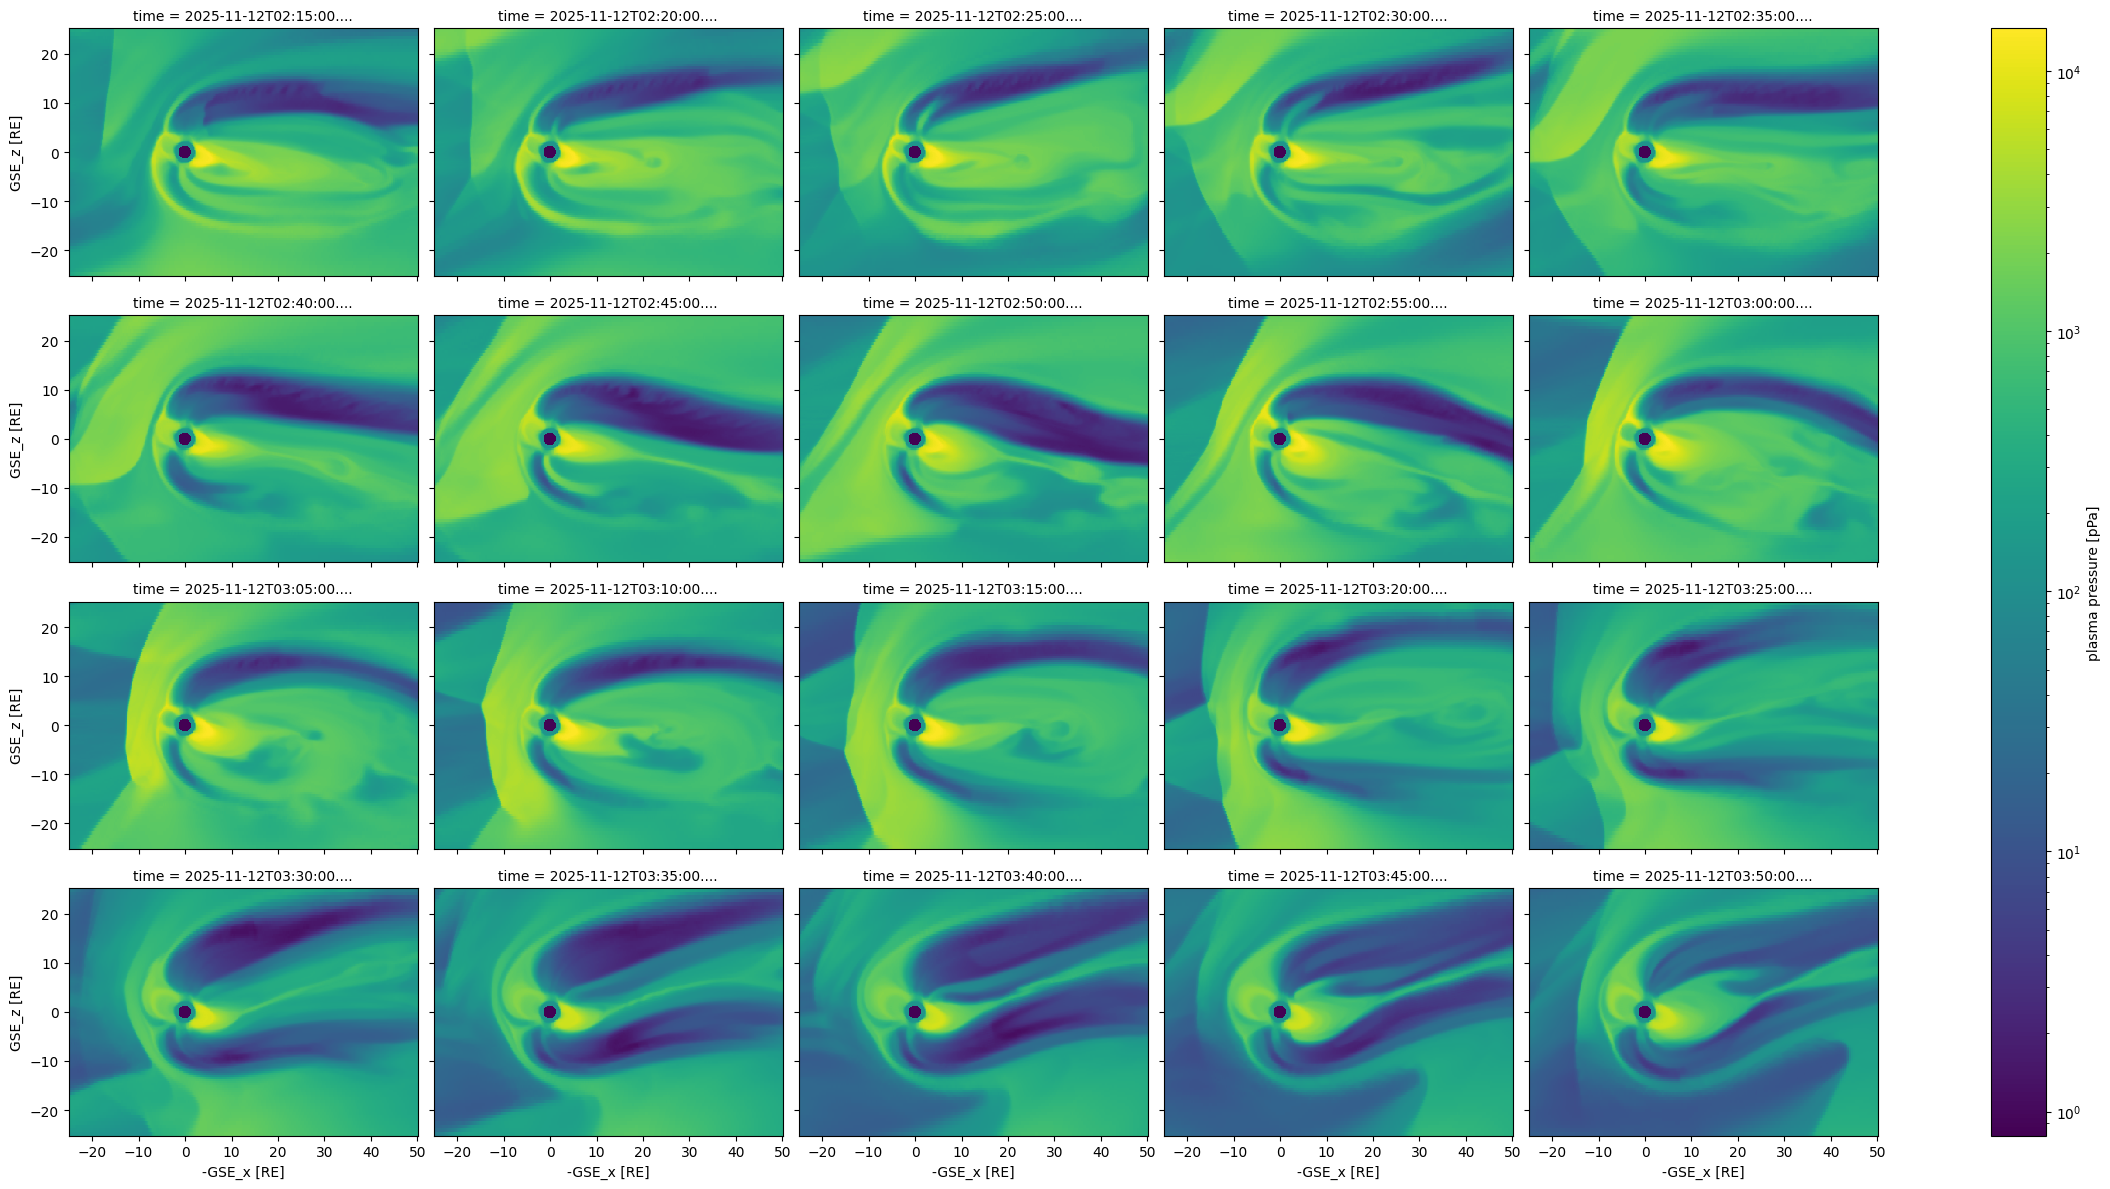

In [11]:
from matplotlib import colors
py_0.pp.sel(x=slice(-25., 50.), z=slice(-25., 25.)).isel(time=slice(50, 70, 1)).T.plot(col="time", col_wrap=5, aspect=1.5, size=3, norm=colors.LogNorm());

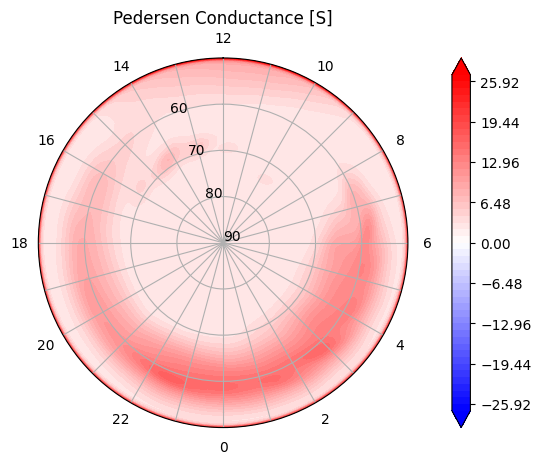

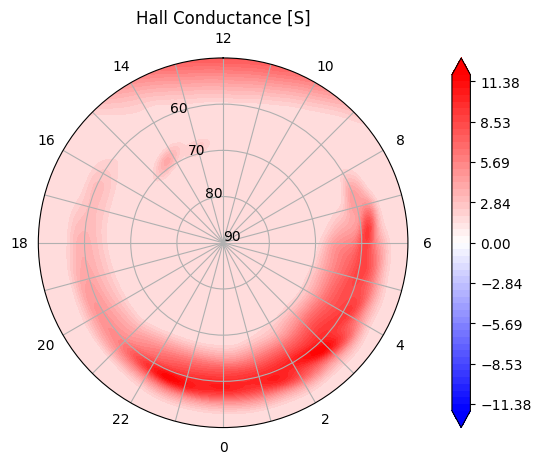

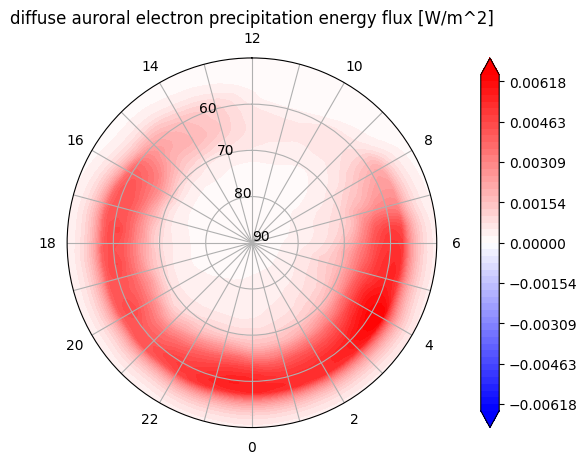

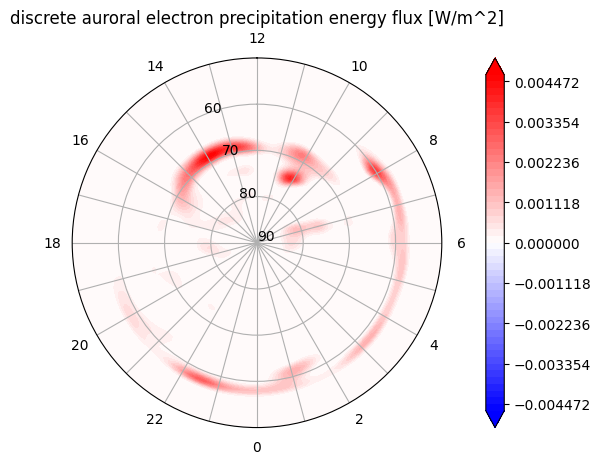

In [12]:
step = 50
iof.isel(time=step).sigp.ggcm.plot()
iof.isel(time=step).sigh.ggcm.plot()
iof.isel(time=step).prec_e_fe_1.ggcm.plot()
iof.isel(time=step).prec_e_fe_2.ggcm.plot()